# Cooperative Coevolution of Predator Robots based on BSO

In [6]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from optim.BSO.bso import bso
from optim.naive.naive import naive
from prey.prey import smartLinear
from visual.visual import Plot

## Define Testing Grid

In [7]:
grid = 30
Ns = 8
Np = 10

## BSO Iteration

BSO caputured with 18 steps


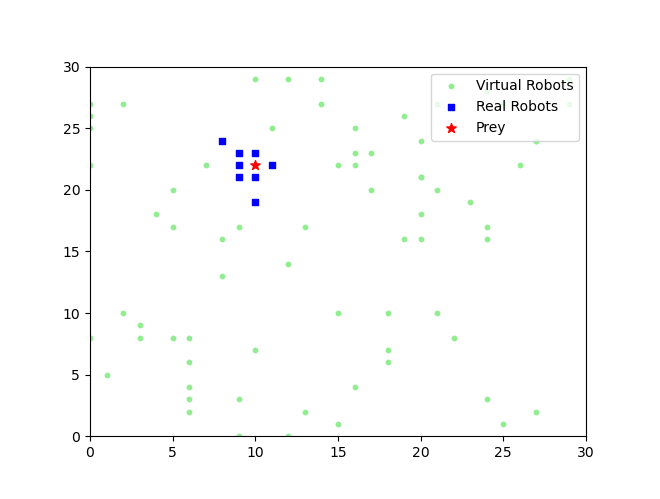

In [8]:
T = 100
p_robots = np.random.randint(0, grid, (Ns, Np, 2))
prey = np.random.randint(0, grid, 2)
plotter = Plot(grid)
for t in range(T):
    prey = smartLinear(p_robots[:, 0], prey, grid)
    if prey is None:
        break
    naive(p_robots, prey, grid)
    plotter.update(p_robots, prey)
if prey is None:
    print(f'BSO caputured with {plotter.cnt} steps')
else:
    print(f'Failed to capture within {plotter.cnt} steps')
plotter.save(file='example.gif')

## Batch Test

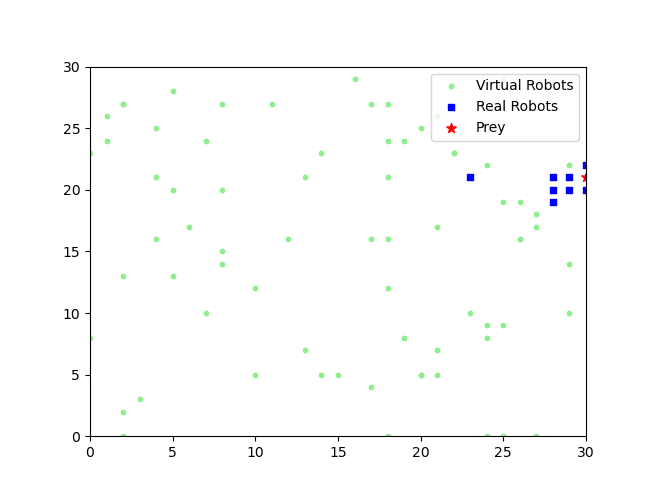

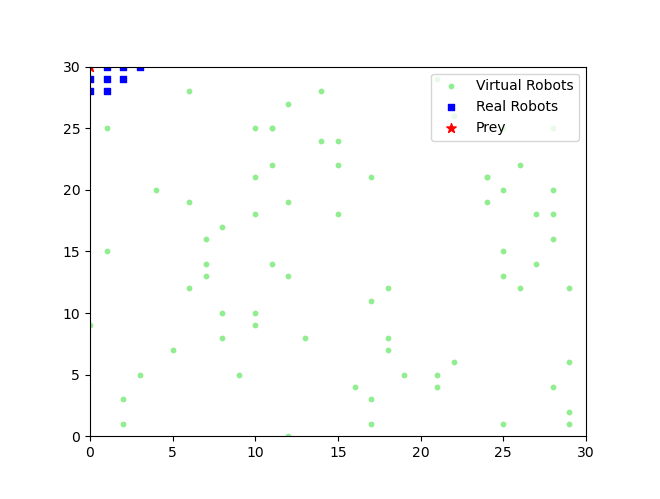

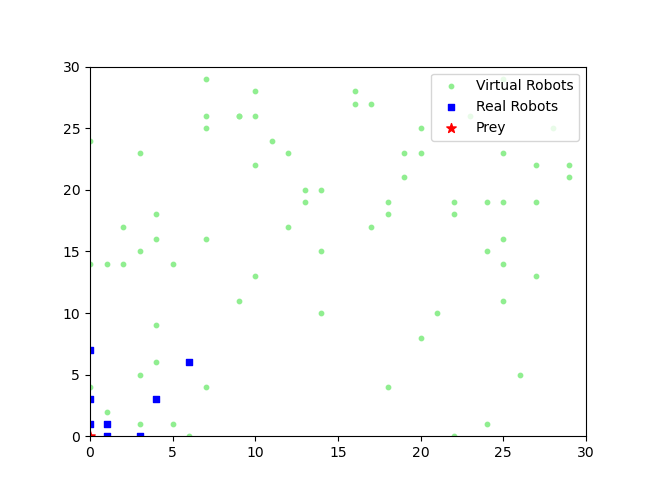

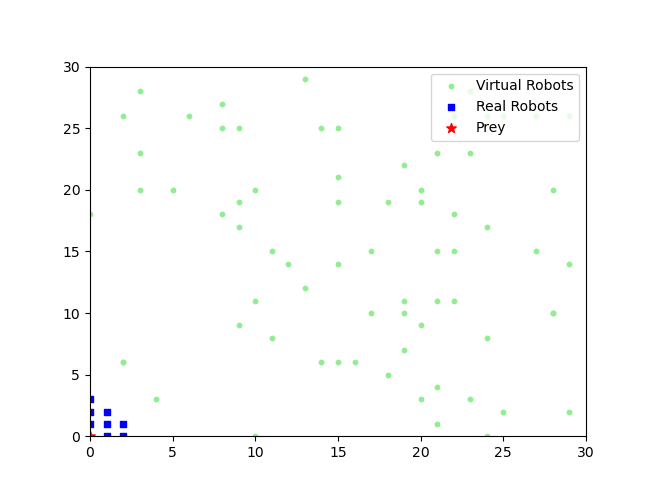

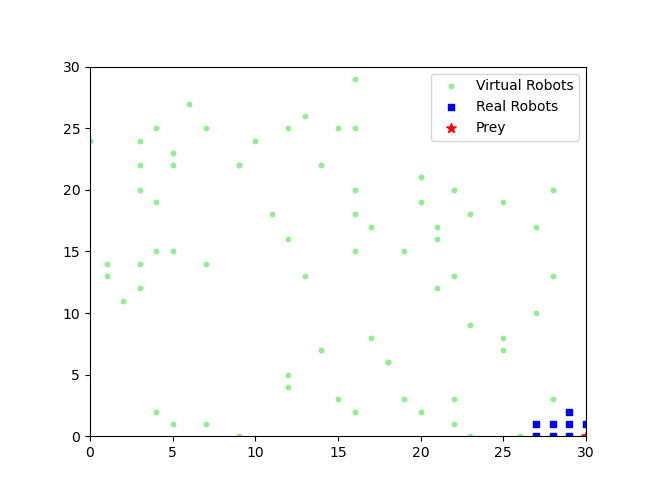

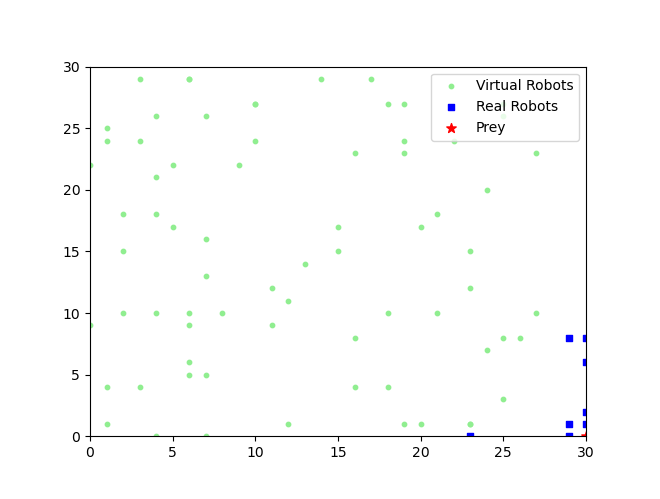

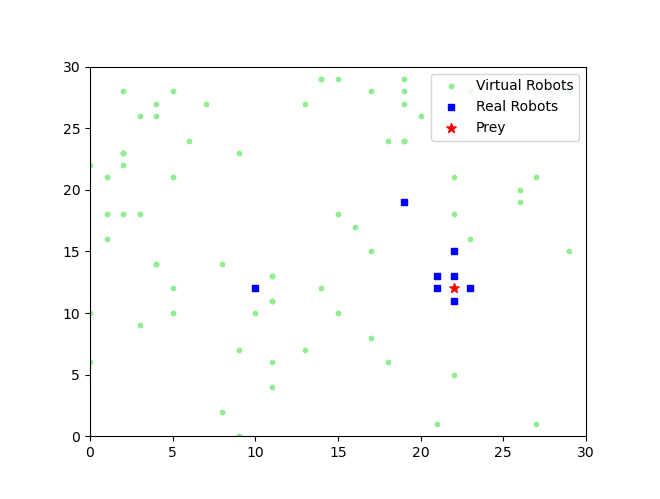

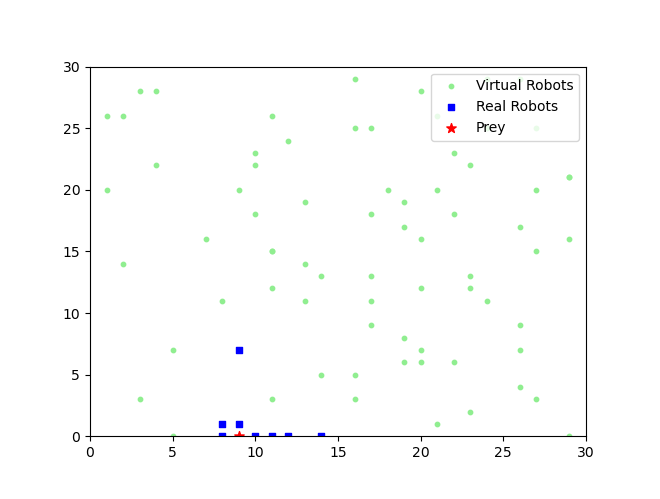

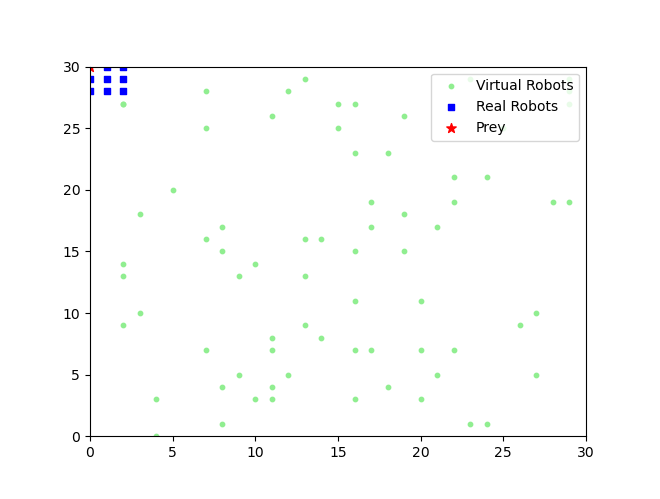

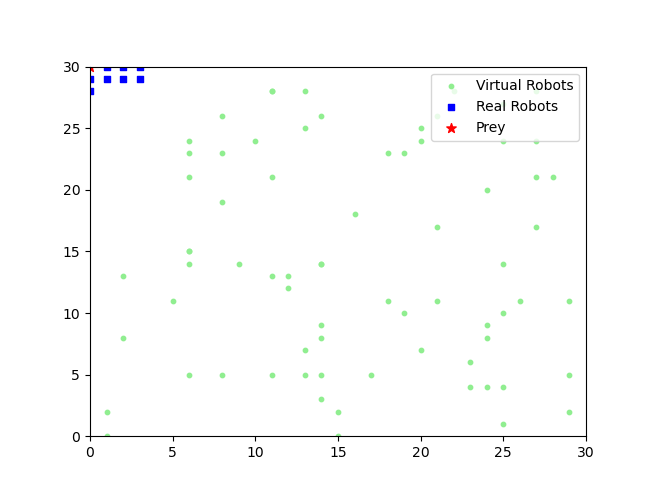

In [ ]:
T = 400
batch_size = 100
folder = time.strftime("%Y-%m-%d_%H-%M-%S", time.localtime(time.time()))
os.makedirs(os.path.join('output', folder), exist_ok=True)
with open('output\\'+folder+'\\record.txt', 'w', encoding='utf-8') as file:
    file.write(f'Predators={Ns}, Grid={grid}*{grid}\n')
    for i in range(batch_size):
        p_robots = np.random.randint(0, grid, (Ns, Np, 2))
        prey = np.random.randint(0, grid, 2)
        plotter = Plot(grid)
        for t in range(T):
            prey = smartLinear(p_robots[:, 0], prey, grid)
            if prey is None:
                break
            naive(p_robots, prey, grid)
            plotter.update(p_robots, prey)
        if prey is None:
            file.write(f'BSO Moves={plotter.cnt}\n')
        else:
            file.write(f'Failed\n')
        plotter.save(file=os.path.join(folder, f'test_{i}.gif'))

## Analysis

Capture Rate: 100.0%
Avg Move: 27.0
Move Std: 12.417729261020309


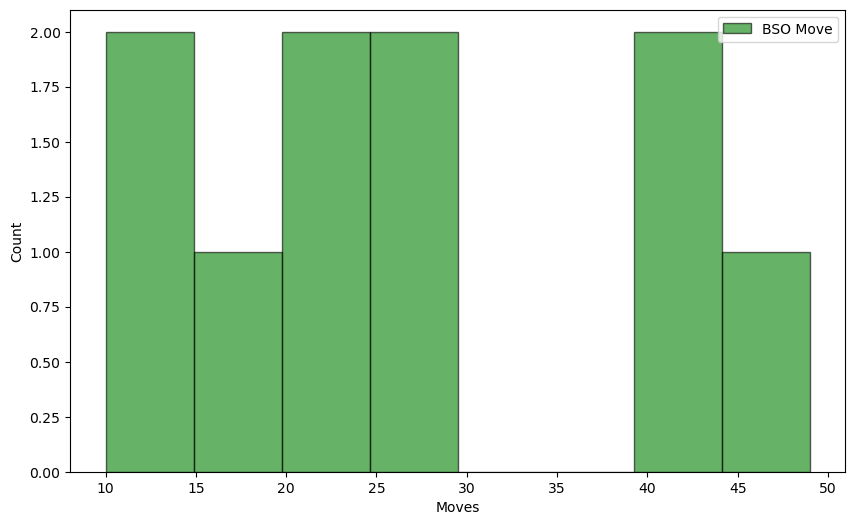

In [10]:
r = []
success = 0
total = 0
with open('output\\'+folder+'\\record.txt', 'r') as file:
    lines = file.readlines()
for line in lines:
    line = line.strip()
    if line.startswith('BSO Moves'):
        number = line.split('=')[1].strip()
        r.append(int(number))
        success += 1
    total += 1
print(f'Capture Rate: {success / (total - 1) * 100}%')
print(f'Avg Move: {np.mean(r)}')
print(f'Move Std: {np.std(r)}')
plt.figure(figsize=(10, 6))
plt.hist(r, bins=8, alpha=0.6, color='green', label='BSO Move', edgecolor='black')
plt.xlabel("Moves")
plt.ylabel("Count")
plt.legend()